In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.shape

(918, 12)

In [5]:
object_columns = dataset.select_dtypes(include='object').columns
unique_values_per_column = {col: dataset[col].unique() for col in object_columns}
unique_values_per_column

{'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object),
 'ExerciseAngina': array(['N', 'Y'], dtype=object),
 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}

In [6]:
dataset.isnull().values.any()

False

In [7]:
dataset[dataset.isnull().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [8]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
dataset['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
dataset['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [12]:
dataset['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [13]:
dataset['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
dataset['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Kategorik sütunlara One-Hot Encoding uygulama
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

dataset.head()

dataset = pd.get_dummies(dataset, columns=['Sex'], drop_first=True)
dataset.head()
dataset["Sex_M"] = dataset["Sex_M"].astype(int)
dataset.head()

In [16]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Sadece One-Hot Encoding ile oluşturulan sütunları seçme
one_hot_columns = df_encoded.columns.difference(dataset.columns)

# Bu sütunlardaki boolean (True/False) değerleri sayısal (0/1) değerlere çevirme
df_encoded[one_hot_columns] = df_encoded[one_hot_columns].astype(int)

In [17]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [18]:
x = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [19]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Sayısal sütunları ölçekleme
scaler = StandardScaler()
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [20]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,0,1,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,0,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,0,0,1,0,1,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,0,1,0,0,0,0,0,1,0


In [21]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
def evaluate_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Doğruluk: {accuracy:.4f}')
    print(f'Hassasiyet (Precision): {precision:.4f}')
    print(f'Geri Çağırma (Recall): {recall:.4f}')
    print(f'F1-Skoru: {f1:.4f}')
    
    # Classification Report ve Confusion Matrix
    print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')
    
    cm = confusion_matrix(y_test, y_pred)
    print("Karışıklık Matrisi:")
    print(cm)
    
    # Confusion Matrix Görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Tahmin Edilen Etiket')
    plt.ylabel('Gerçek Etiket')
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.show()
    
    return accuracy


Naive Bayes:
Doğruluk: 0.8587
Hassasiyet (Precision): 0.9091
Geri Çağırma (Recall): 0.8411
F1-Skoru: 0.8738

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Karışıklık Matrisi:
[[68  9]
 [17 90]]


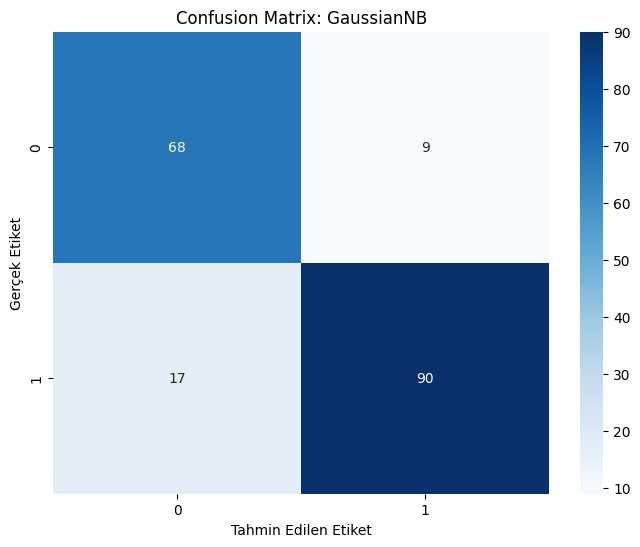

0.8586956521739131

In [24]:
print("\nNaive Bayes:")
nb = GaussianNB()
evaluate_model(nb)


Destek Vektör Makineleri (SVM):
Doğruluk: 0.8533
Hassasiyet (Precision): 0.9000
Geri Çağırma (Recall): 0.8411
F1-Skoru: 0.8696

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Karışıklık Matrisi:
[[67 10]
 [17 90]]


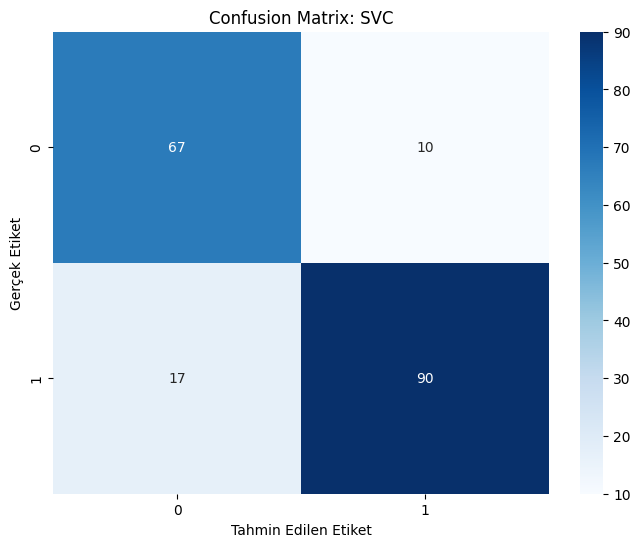

0.8532608695652174

In [25]:
print("\nDestek Vektör Makineleri (SVM):")
svm = SVC(kernel='linear')
evaluate_model(svm)


Karar Ağaçları:
Doğruluk: 0.8315
Hassasiyet (Precision): 0.8585
Geri Çağırma (Recall): 0.8505
F1-Skoru: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.86      0.85      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Karışıklık Matrisi:
[[62 15]
 [16 91]]


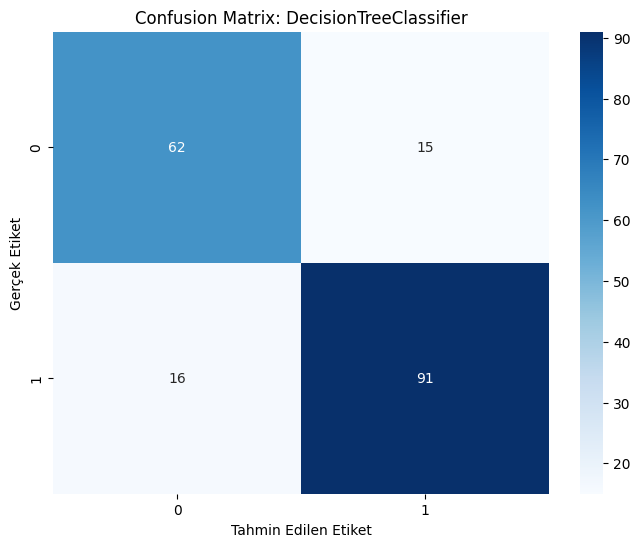

0.8315217391304348

In [26]:
print("\nKarar Ağaçları:")
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt)


Rastgele Orman (Random Forest):
Doğruluk: 0.8750
Hassasiyet (Precision): 0.8962
Geri Çağırma (Recall): 0.8879
F1-Skoru: 0.8920

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Karışıklık Matrisi:
[[66 11]
 [12 95]]


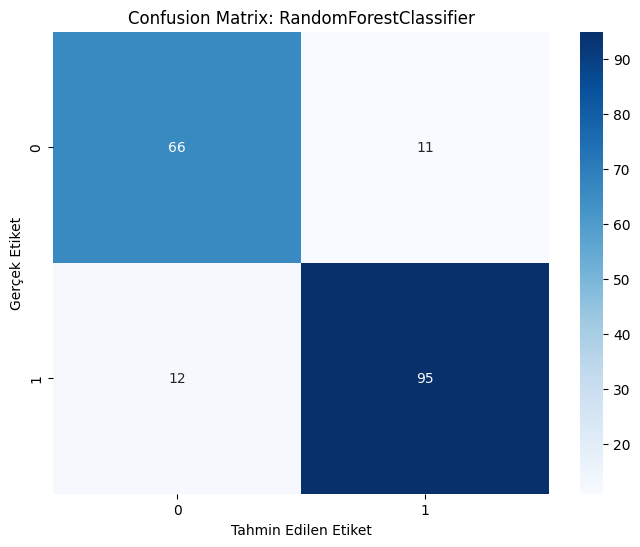

0.875

In [27]:
print("\nRastgele Orman (Random Forest):")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf)


XGBoost:
Doğruluk: 0.8587
Hassasiyet (Precision): 0.9010
Geri Çağırma (Recall): 0.8505
F1-Skoru: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Karışıklık Matrisi:
[[67 10]
 [16 91]]


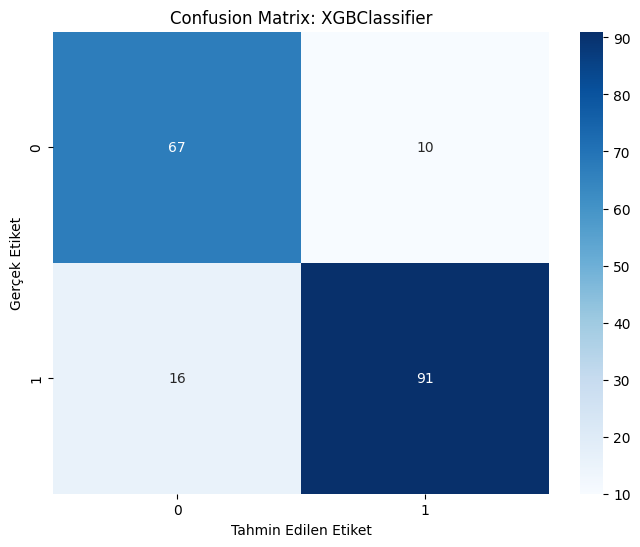

0.8586956521739131

In [28]:
print("\nXGBoost:")
xgb = XGBClassifier(random_state=42)
evaluate_model(xgb)

In [29]:
# Çapraz Doğrulama (isteğe bağlı)
def cross_validate(model):
    cv_scores = cross_val_score(model, x, y, cv=10)
    print(f'Çapraz Doğrulama Ortalama Doğruluk: {cv_scores.mean():.4f}')
    return cv_scores.mean()

In [31]:
print("\nÇapraz Doğrulama Sonuçları:")
print(f"nb",cross_validate(nb))
print(f"svm",cross_validate(svm))
print(f"dt",cross_validate(dt))
print(f"rf",cross_validate(rf))
print(f"xgb",cross_validate(xgb))


Çapraz Doğrulama Sonuçları:
Çapraz Doğrulama Ortalama Doğruluk: 0.8484
nb 0.8483874820831343
Çapraz Doğrulama Ortalama Doğruluk: 0.8473
svm 0.8472885809842332
Çapraz Doğrulama Ortalama Doğruluk: 0.7678
dt 0.767845198279981
Çapraz Doğrulama Ortalama Doğruluk: 0.8462
rf 0.846225513616818
Çapraz Doğrulama Ortalama Doğruluk: 0.8441
xgb 0.8440874343048256
